# 2 Data wrangling

## 2.3 Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
sns.set()

In [2]:
from ipywidgets import FileUpload
from IPython.display import display
import io
from PIL import Image

## 2.5 Load The 'Olist' E-Commerce Dataset

In [3]:
order_items = pd.read_csv(r'C:\Users\JIYOON JUNG\Desktop\Springboard\Unit 15 Data Wrangling\Capstone2\Brazilian E-Commerce Public Dataset by Olist\olist_order_items_dataset.csv')
orders = pd.read_csv(r'C:\Users\JIYOON JUNG\Desktop\Springboard\Unit 15 Data Wrangling\Capstone2\Brazilian E-Commerce Public Dataset by Olist\olist_orders_dataset.csv')
payments = pd.read_csv(r'C:\Users\JIYOON JUNG\Desktop\Springboard\Unit 15 Data Wrangling\Capstone2\Brazilian E-Commerce Public Dataset by Olist\olist_order_payments_dataset.csv')
products = pd.read_csv(r'C:\Users\JIYOON JUNG\Desktop\Springboard\Unit 15 Data Wrangling\Capstone2\Brazilian E-Commerce Public Dataset by Olist\olist_products_dataset.csv')
sellers = pd.read_csv(r'C:\Users\JIYOON JUNG\Desktop\Springboard\Unit 15 Data Wrangling\Capstone2\Brazilian E-Commerce Public Dataset by Olist\olist_sellers_dataset.csv')
customers = pd.read_csv(r'C:\Users\JIYOON JUNG\Desktop\Springboard\Unit 15 Data Wrangling\Capstone2\Brazilian E-Commerce Public Dataset by Olist\olist_customers_dataset.csv')
geolocation = pd.read_csv(r'C:\Users\JIYOON JUNG\Desktop\Springboard\Unit 15 Data Wrangling\Capstone2\Brazilian E-Commerce Public Dataset by Olist\olist_geolocation_dataset.csv')
reviews = pd.read_csv(r'C:\Users\JIYOON JUNG\Desktop\Springboard\Unit 15 Data Wrangling\Capstone2\Brazilian E-Commerce Public Dataset by Olist\olist_order_reviews_dataset.csv')
translation = pd.read_csv(r'C:\Users\JIYOON JUNG\Desktop\Springboard\Unit 15 Data Wrangling\Capstone2\Brazilian E-Commerce Public Dataset by Olist\product_category_name_translation.csv')

## 2.6 Explore The Data

### Olist Orders Dataset

In [4]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [5]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


Some values are missing in the 'order_approved_at,' 'order_delivered_carrier_date,' and 'order_delivered_customer_date' columns. This dataset might contain closed orders and some open status orders.

In [6]:
orders[orders['order_approved_at'].isnull() == True]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
1130,00b1cb0320190ca0daa2c88b35206009,3532ba38a3fd242259a514ac2b6ae6b6,canceled,2018-08-28 15:26:39,NaN,NaN,NaN,2018-09-12 00:00:00
1801,ed3efbd3a87bea76c2812c66a0b32219,191984a8ba4cbb2145acb4fe35b69664,canceled,2018-09-20 13:54:16,NaN,NaN,NaN,2018-10-17 00:00:00
1868,df8282afe61008dc26c6c31011474d02,aa797b187b5466bc6925aaaa4bb3bed1,canceled,2017-03-04 12:14:30,NaN,NaN,NaN,2017-04-10 00:00:00
2029,8d4c637f1accf7a88a4555f02741e606,b1dd715db389a2077f43174e7a675d07,canceled,2018-08-29 16:27:49,NaN,NaN,NaN,2018-09-13 00:00:00
2161,7a9d4c7f9b068337875b95465330f2fc,7f71ae48074c0cfec9195f88fcbfac55,canceled,2017-05-01 16:12:39,NaN,NaN,NaN,2017-05-30 00:00:00
...,...,...,...,...,...,...,...,...
97696,5a00b4d35edffc56b825c3646a99ba9d,6a3bdf004ca96338fb5fad1b8d93c2e6,canceled,2017-07-02 15:38:46,NaN,NaN,NaN,2017-07-25 00:00:00
98415,227c804e2a44760671a6a5697ea549e4,62e7477e75e542243ee62a0ba73f410f,canceled,2017-09-28 15:02:56,NaN,NaN,NaN,2017-10-16 00:00:00
98909,e49e7ce1471b4693482d40c2bd3ad196,e4e7ab3f449aeb401f0216f86c2104db,canceled,2018-08-07 11:16:28,NaN,NaN,NaN,2018-08-10 00:00:00
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaN,NaN,NaN,2018-10-01 00:00:00


This result shows that the 'order_approved_at,' 'order_delivered_carrier_date,' and 'order_delivered_customer_date' columns are shown up as "N/A" value when the order_status is "canceled." Now, we need to see what type of 'order_status' this dataset contains.

In [7]:
orders['order_status'].value_counts(dropna=False).to_frame('count').join(
    orders['order_status'].value_counts(dropna=False, normalize=True).to_frame('normalize')).round(4)

,count,normalize
delivered,96478,0.9702
shipped,1107,0.0111
canceled,625,0.0063
unavailable,609,0.0061
invoiced,314,0.0032
processing,301,0.0030
created,5,0.0001
approved,2,0.0000


Based on the results, we can tell that the olist_order_status dataset contains closed, open, and canceled status orders, and there are no NA values in this column. A total of 97% of total records are "closed" orders, which are shown up as "delivered" in the "order_status" columns.

#### Joining data

To prepare the complete dataset for analysis, we need to join multiple tables. 

Before doing that, let's refresh our memory by looking at the image below, which shows the relationship between the databases. 

The primary dataset that we'll use is the "olist_orders_dataset," and the three databases are connected to it directly using the order_id. Additionally, the "olist_customer_dataset" is linked to the order dataset by using customer_id as the key. Let's examine the columns in each dataset and determine if we need them for this project.

In [8]:
uploader = FileUpload(accept=r'C:\Users\JIYOON JUNG\Desktop\Springboard\Unit 15 Data Wrangling\Capstone2\Brazilian E-Commerce Public Dataset by Olist\db_relationship.JPG', multiple=False)
display(uploader)

FileUpload(value={}, accept='C:\\Users\\JIYOON JUNG\\Desktop\\Springboard\\Unit 15 Data Wrangling\\Capstone2\\…

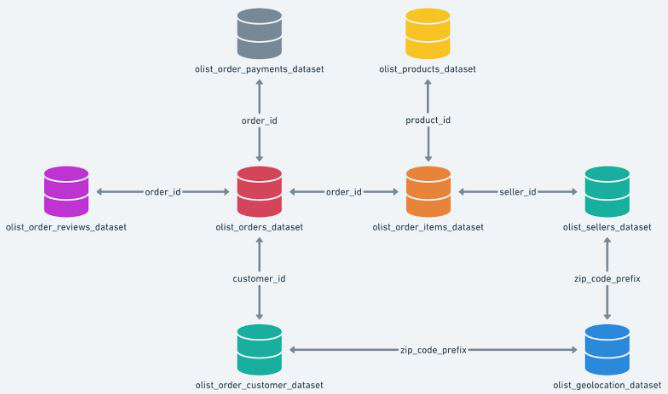

In [10]:
file_name = list(uploader.value.keys())[0]
image_binary_info = uploader.value[file_name]['content']
img_up = Image.open(io.BytesIO(image_binary_info))
img_up

In [11]:
orders.head(2)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00


In [12]:
payments.head(2)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39


In [13]:
payments['payment_type'].value_counts()

credit_card    76795
boleto         19784
voucher         5775
debit_card      1529
not_defined        3
Name: payment_type, dtype: int64

In [14]:
payments['payment_installments'].value_counts().sort_index(ascending=True).to_frame('number').join(
    payments['payment_installments'].value_counts(dropna=False, normalize=True).to_frame('%')).round(4).join(
    payments.groupby('payment_installments')['payment_value'].mean().to_frame('avrg_value')
)

,number,%,avrg_value
0,2,0.0000,94.315000
1,52546,0.5058,112.420229
2,12413,0.1195,127.228150
3,10461,0.1007,142.539317
4,7098,0.0683,163.976840
5,5239,0.0504,183.465222
6,3920,0.0377,209.849952
7,1626,0.0157,187.673672
8,4268,0.0411,307.737427
9,644,0.0062,203.440870


In the payment database, we can find information about the payment method and the number of installments. It is worth noting that 51% of all orders are paid in full, without any installments. The average value of an order tends to increase as the number of installments increases. Now, the question is whether there is a correlation between the number of installments and sales. To answer this question, we need to join the payment and order datasets for a correlation analysis.

In [15]:
payments_subset = payments[['order_id', 'payment_installments', 'payment_value']]
orders = pd.merge(orders, payments_subset, how='left', on='order_id')

In [16]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_installments,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,18.12
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,2.00
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,18.59
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1.0,141.46
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3.0,179.12


In [17]:
reviews.head(2)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13


In [18]:
reviews['review_score'].value_counts().sort_index(ascending=True).to_frame('score').join(
    reviews['review_score'].value_counts(dropna=False, normalize=True).to_frame('%'))

,score,%
1,11424,0.115133
2,3151,0.031756
3,8179,0.082430
4,19142,0.192917
5,57328,0.577763


In [19]:
reviews['review_score'].mean()

4.08642062404257

In order to determine customer satisfaction with the product, we can analyze the 'review_score' column in the review database. The average score is 4.08, with over 73% of products receiving a score of 4 or higher. The review score corresponds to the number of installments, and we are currently researching any potential correlation between the score and sales. We plan to combine this information with the order dataset for further analysis. 

In [20]:
reviews_subset = reviews[['order_id','review_score']]
orders = pd.merge(orders, reviews_subset, how='left', on='order_id')

In [21]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_installments,payment_value,review_score
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,18.12,4.0
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,2.00,4.0
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,18.59,4.0
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1.0,141.46,4.0
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3.0,179.12,5.0


In [22]:
order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


To analyze the sales trend of each item, seller, and price range level, the order_items database provides crucial information such as item details, seller information, item price, and freight value. To facilitate the analysis, we will combine all columns from the order database.

In [23]:
orders = pd.merge(orders, order_items, how='left', on='order_id')

In [24]:
products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


Now that we have linked the orders to the respective items, we can further link them to the table with more detailed information about the product. The product dataset contains important details such as category, dimensions, and photos. However, since our focus is on sales prediction in this capstone, we won't delve into the relationship between the product dimensions and freight expenses. Instead, we will primarily focus on the product category, the number of photos on the website, and their impact on sales. 

In [25]:
products_subset = products[['product_id','product_category_name', 'product_photos_qty']]
orders = pd.merge(orders, products_subset, how='left', on='product_id')

In [26]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_installments,payment_value,review_score,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_photos_qty
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,18.12,4.0,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,utilidades_domesticas,4.0
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,2.00,4.0,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,utilidades_domesticas,4.0
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,18.59,4.0,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,utilidades_domesticas,4.0
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1.0,141.46,4.0,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,perfumaria,1.0
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3.0,179.12,5.0,1.0,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,automotivo,1.0


In [27]:
sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


The dataset contains geological information about sellers, which can help us analyze the distance between sellers and customers. We will examine the correlation between delivery lead time and sales and decide whether to use this information to predict sales in the future analysis. If we find that delivery lead time has a significant impact on sales, we will include the seller's geological information to calculate the distance.  

In [28]:
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [29]:
geolocation.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


The dataset contains geological information about sellers, which can help us analyze the distance between sellers and customers. We will examine the correlation between delivery lead time and sales and decide whether to use this information to predict sales in the future analysis. If we find that delivery lead time has a significant impact on sales, we will include the seller's geological information to calculate the distance.

In [30]:
orders = pd.merge(orders, customers, how='left', on='customer_id')
geolocation['customer_zip_code_prefix'] = geolocation['geolocation_zip_code_prefix']
orders = pd.merge(orders, geolocation, how='left', on='customer_zip_code_prefix')

### Complete Dataset

In [31]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18188958 entries, 0 to 18188957
Data columns (total 28 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   order_id                       object 
 1   customer_id                    object 
 2   order_status                   object 
 3   order_purchase_timestamp       object 
 4   order_approved_at              object 
 5   order_delivered_carrier_date   object 
 6   order_delivered_customer_date  object 
 7   order_estimated_delivery_date  object 
 8   payment_installments           float64
 9   payment_value                  float64
 10  review_score                   float64
 11  order_item_id                  float64
 12  product_id                     object 
 13  seller_id                      object 
 14  shipping_limit_date            object 
 15  price                          float64
 16  freight_value                  float64
 17  product_category_name          object 
 18  

In [32]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_installments,payment_value,...,product_photos_qty,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,18.12,...,4.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,3149.0,-23.574809,-46.587471,sao paulo,SP
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,18.12,...,4.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,3149.0,-23.578333,-46.587123,sao paulo,SP
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,18.12,...,4.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,3149.0,-23.574809,-46.587471,sao paulo,SP
3,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,18.12,...,4.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,3149.0,-23.575033,-46.587451,sao paulo,SP
4,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,18.12,...,4.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,3149.0,-23.580054,-46.586673,sao paulo,SP


#### Subsetting data

Since this dataset has information on 100k+ orders from 2017 to 2018, we need to subset the data in 2017 to create an order prediction model for 2018. Again, this capstone project aims to create a sales prediction model for Olist, so we will use the 2018 data to validate the model's accuracy. 

First, we need to change the datatype of columns 'order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date' and 'order_estimated_delivery_date' to datetime.

In [33]:
from datetime import datetime

purchase_dt = orders['order_purchase_timestamp']
purchase_dt = [datetime.strptime(x, '%Y-%m-%d %H:%M:%S') for x in purchase_dt]
orders['order_purchase_timestamp'] = purchase_dt

KeyboardInterrupt: 

In [ ]:
''' 

approved_dt = str(orders['order_approved_at'])
approved_dt = [datetime.strptime(x, '%Y-%m-%d %H:%M:%S') for x in approved_dt]
orders['order_approved_at'] = approved_dt

shipped_dt = str(orders['order_approved_at'])
shipped_dt = [datetime.strptime(x, '%Y-%m-%d %H:%M:%S') for x in shipped_dt]
orders['order_approved_at'] = shipped_dt

delivered_dt = orders['order_delivered_customer_date']
delivered_dt = [datetime.strptime(x, '%Y-%m-%d %H:%M:%S') for x in delivered_dt]
orders['order_delivered_customer_date'] = delivered_dt

ETA_dt = orders['order_estimated_delivery_date']
ETA_dt = [datetime.strptime(x, '%Y-%m-%d %H:%M:%S') for x in ETA_dt]
orders['order_estimated_delivery_date'] = ETA_dt


'''

In [ ]:
orders["purchase_year"] = orders['order_purchase_timestamp'].dt.year
orders["purchase_month"] = orders['order_purchase_timestamp'].dt.month
orders["purchase_day"]= orders['order_purchase_timestamp'].dt.day

Then, we will subset the 2017 order data and save it to the "orders17' variable. 

In [35]:
orders17 = orders[orders['order_purchase_timestamp'].dt.year == 2017]

AttributeError: Can only use .dt accessor with datetimelike values

In [ ]:
orders17.info()

Now, you can see the data type of the "order_purchase_timestamp' column has been changed to the "datetime64" and the total number of entries is decreased to 45101.

#### Order Data Visulization

In [34]:
# Calculate the counts for each purchase month
purchase_month_counts = orders17['purchase_month'].value_counts().reset_index()
purchase_month_counts.columns = ['purchase_month', 'count']

# Create a DataFrame with all months
all_months = pd.DataFrame({'purchase_month': range(1, 13)})

# Merge to include all months and fill NaN values with 0
merged_data = all_months.merge(purchase_month_counts, on='purchase_month', how='left').fillna(0)

# Plotting the barplot
plt.figure(figsize=(15, 4))
sns.barplot(data=merged_data, x='purchase_month', y='count')
plt.xlabel('Month')
plt.ylabel('Order count')
plt.title('Order count by month')
plt.show()

NameError: name 'orders17' is not defined

#### Missing Values

In [36]:
missing = pd.concat([orders.isnull().sum(), 100 * orders.isnull().mean()], axis=1)
missing.columns=['count', '%']
print(missing.sort_values('%',ascending=False))

                                count         %
order_delivered_customer_date  496943  2.732114
product_category_name          385842  2.121298
product_photos_qty             385842  2.121298
order_delivered_carrier_date   318246  1.749666
review_score                   143939  0.791354
freight_value                  124697  0.685564
price                          124697  0.685564
seller_id                      124697  0.685564
product_id                     124697  0.685564
order_item_id                  124697  0.685564
shipping_limit_date            124697  0.685564
order_approved_at               27290  0.150036
payment_installments             1035  0.005690
payment_value                    1035  0.005690
geolocation_lat                   322  0.001770
geolocation_zip_code_prefix       322  0.001770
geolocation_lng                   322  0.001770
geolocation_city                  322  0.001770
geolocation_state                 322  0.001770
customer_unique_id                  0  0

In [38]:
orders[orders['product_category_name'].isnull() == True].head(10)

MemoryError: Unable to allocate 1.36 GiB for an array with shape (10, 18188958) and data type float64